# Manipulating data and metadata in cf-python

---------

## Homepage https://ncas-cms.github.io/cf-python for background, tutorial, reference, and   installation

---------

## Contents:

### 1. Read, inspect, write netCDF files
### 2. Subspace
### 3. Data
### 4. Calculate statistics
### 5. PP and UM datasets
### 6. What this course doesn't cover
----

# 1. Read, inspect and write files
https://ncas-cms.github.io/cf-python/function/cf.read.html

In [1]:
import cf
cf.__version__

'3.12.0'

In [2]:
cf.CF()

'1.9'

In [3]:
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]

In [4]:
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [5]:
print(f)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


https://ncas-cms.github.io/cf-python/method/cf.Field.dump.html

In [6]:
f.dump()

----------------------------------
Field: air_temperature (ncvar%tas)
----------------------------------
CDI = 'Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)'
CDO = 'Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)'
Conventions = 'CF-1.5'
_FillValue = 1.0000000200408773e+20
associated_files = 'baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation
                    gridspecFile: gridspec_atmos_fx_IPSL-
                    CM5A-LR_historical_r0i0p0.nc areacella: areacella_fx_IPSL-
                    CM5A-LR_historical_r0i0p0.nc'
branch_time = 1850.0
cmor_version = '2.5.1'
comment = 'This 20th century simulation include natural and anthropogenic
           forcings.'
contact = 'ipsl-cmip5 _at_ ipsl.jussieu.fr Data manager : Sebastien Denvil'
creation_date = '2011-02-23T17:52:35Z'
experiment = 'historical'
experiment_id = 'historical'
forcing = 'Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA'
frequency = 'mon'
history = "Thu May 26 15:47:13 2016: cdo mergetime 

### Properties

https://ncas-cms.github.io/cf-python/method/cf.Field.properties.html

In [7]:
f.properties()

{'Conventions': 'CF-1.5',
 'comment': 'This 20th century simulation include natural and anthropogenic forcings.',
 'model_id': 'IPSL-CM5A-LR',
 'CDI': 'Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)',
 'parent_experiment_id': 'piControl',
 'creation_date': '2011-02-23T17:52:35Z',
 'frequency': 'mon',
 'references': 'Model documentation and further reference available here : http://icmc.ipsl.fr',
 'title': 'IPSL-CM5A-LR model output prepared for CMIP5 historical',
 'original_name': 't2m',
 'contact': 'ipsl-cmip5 _at_ ipsl.jussieu.fr Data manager : Sebastien Denvil',
 'source': 'IPSL-CM5A-LR (2010) : atmos : LMDZ4 (LMDZ4_v5, 96x95x39); ocean : ORCA2 (NEMOV2_3, 2x2L31); seaIce : LIM2 (NEMOV2_3); ocnBgchem : PISCES (NEMOV2_3); land : ORCHIDEE (orchidee_1_9_4_AR5)',
 'experiment': 'historical',
 'realization': 1,
 'project_id': 'CMIP5',
 'institute_id': 'IPSL',
 'initialization_method': 1,
 'product': 'output',
 'tracking_id': '826ee5e9-3cc9-40a6-a42b-d84c6b4aad97',
 'cmor_

In [8]:
f.get_property('project_id')

'CMIP5'

In [9]:
f.set_property('project_id', 'banana')
f.get_property('project_id')

'banana'

In [10]:
f.del_property('project_id')
f.get_property('project_id')  # This should fail!

ValueError: 'Field' has no 'project_id' property

In [11]:
f.get_property('project_id', 'no project')

'no project'

https://ncas-cms.github.io/cf-python/method/cf.Field.get_property.html

In [12]:
help(f.get_property)

Help on method get_property in module cf.mixin.properties:

get_property(prop, default=ValueError()) method of cf.field.Field instance
    Get a CF property.
    
    .. versionadded:: 3.0.0
    
    .. seealso:: `clear_properties`, `del_property`, `has_property`,
                 `properties`, `set_property`
    
    :Parameters:
    
        prop: `str`
            The name of the CF property.
    
            *Parameter example:*
              ``prop='long_name'``
    
        default: optional
            Return the value of the *default* parameter if the
            property has not been set.
    
            If set to an `Exception` instance then it will be
            raised instead.
    
    :Returns:
    
            The value of the named property or the default value, if
            set.
    
    **Examples:**
    
    >>> f = cf.Field()
    >>> f.set_property('project', 'CMIP7')
    >>> f.has_property('project')
    True
    >>> f.get_property('project')
    'CMIP7'
    >>>

### Shorthand for named CF properties
http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#attribute-appendix

In [13]:
print(f.standard_name)
f.standard_name = 'banana'
print(f.standard_name)
del(f.standard_name)
f.standard_name = 'air_temperature'
print(f.standard_name)

air_temperature
banana
air_temperature


### Reading many files

In [14]:
fl = cf.read('ncas_data/data[1-5].nc')
print(type(fl))
fl

<class 'cf.fieldlist.FieldList'>


[<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K>,
 <CF Field: eastward_wind(time(2), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

### A `FieldList` object inherits all of the usual Python `list` functionality 

In [15]:
for x in fl:
    print('IDENTITY:', x.identity(), 'SHAPE:', x.shape, 'UNITS:', x.units)

IDENTITY: long_name=Potential vorticity SHAPE: (1, 23, 160, 320) UNITS: K m**2 kg**-1 s**-1
IDENTITY: air_temperature SHAPE: (1, 1, 160, 320) UNITS: K
IDENTITY: air_temperature SHAPE: (1, 23, 160, 320) UNITS: K
IDENTITY: air_temperature SHAPE: (1, 1, 256, 512) UNITS: K
IDENTITY: eastward_wind SHAPE: (2, 23, 160, 320) UNITS: m s**-1
IDENTITY: northward_wind SHAPE: (1, 23, 160, 320) UNITS: m s**-1


### Select by list position with the usual list indices

In [16]:
g = fl[0]
g

<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>

In [17]:
fl[1:]

[<CF Field: air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K>,
 <CF Field: eastward_wind(time(2), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

In [18]:
fl[4:]

[<CF Field: eastward_wind(time(2), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

### Select by metadata
https://ncas-cms.github.io/cf-python/tutorial.html#sorting-and-selecting-from-field-lists

In [19]:
fl.select('air_temperature')

[<CF Field: air_temperature(long_name=t(1), long_name=p(1), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(long_name=t(1), long_name=p(1), long_name=latitude(256), long_name=longitude(512)) K>]

In [20]:
fl.select('northward_wind')

[<CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

In [21]:
fl.select_by_units('km h-1')

[]

In [22]:
fl.select_by_units('km h-1', exact=False)

[<CF Field: eastward_wind(time(2), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

In [23]:
import re
fl.select(re.compile('(east|north)ward_wind'))

[<CF Field: eastward_wind(time(2), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

# Write fields to a netCDF file
https://ncas-cms.github.io/cf-python/function/cf.write.html

In [24]:
cf.write(f, 'new_file.nc')

https://ncas-cms.github.io/cf-python/method/cf.Field.equals.html

In [25]:
g = cf.read('new_file.nc')[0]
f.equals(g)

True

# 2. Subspace a field


### Index-space: [square brackets] 
https://ncas-cms.github.io/cf-python/tutorial.html#subspacing-by-index

In [26]:
print(f)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [27]:
print(f[0, 0, 0])

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(1), longitude(1)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1959-12-16 12:00:00] 365_day
                : latitude(1) = [-90.0] degrees_north
                : longitude(1) = [0.0] degrees_east
                : height(1) = [2.0] m


In [28]:
print(f[0:6, :, :])

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(6), latitude(145), longitude(192)) K
Cell methods    : time(6): mean (interval: 30 minutes)
Dimension coords: time(6) = [1959-12-16 12:00:00, ..., 1960-05-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


### Metadata-space: (`subspace` method)
https://ncas-cms.github.io/cf-python/tutorial.html#subspacing-by-metadata

In [29]:
print(f)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [30]:
print(f.subspace(longitude=180))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(1)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(1) = [180.0] degrees_east
                : height(1) = [2.0] m


#### `cf.lt(30)` is a "query" that means *less than 30*

https://ncas-cms.github.io/cf-python/tutorial.html#encapsulating-conditions

In [31]:
print(f.subspace(latitude=cf.lt(30)))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(96), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(96) = [-90.0, ..., 28.75] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


#### `cf.wi(90, 270)` is a query that means *within the range [90, 270]*

In [32]:
print(f.subspace(longitude=cf.wi(90, 270)))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(97)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(97) = [90.0, ..., 270.0] degrees_east
                : height(1) = [2.0] m


In [33]:
g = f.subspace(time=cf.dt('1965-11-16'))
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1965-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


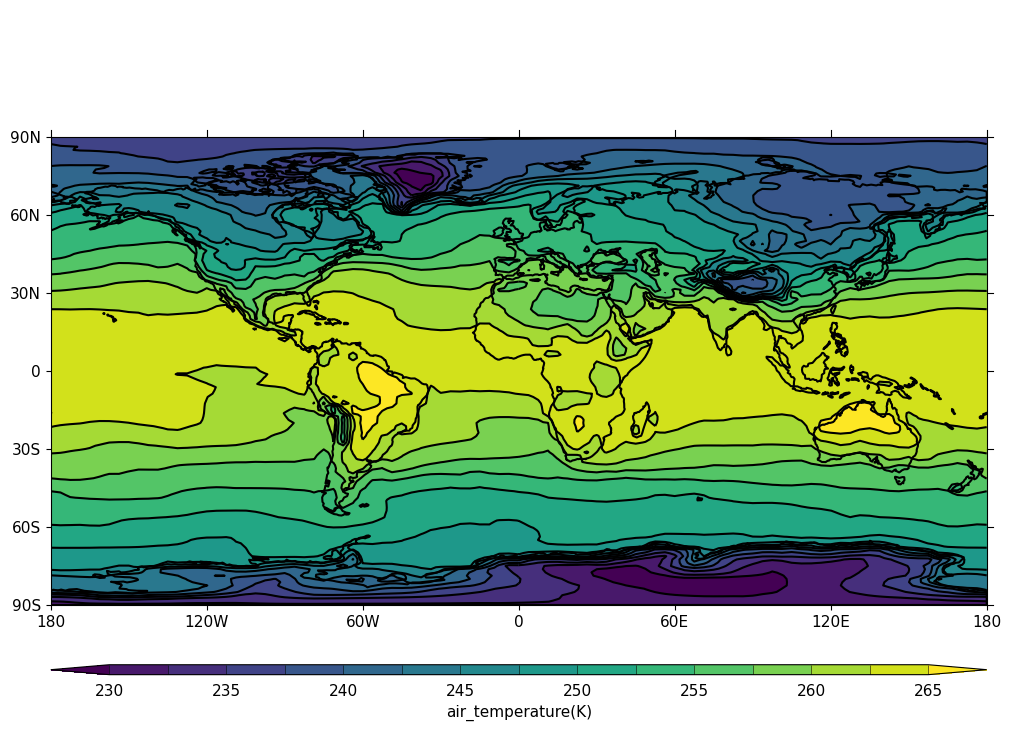

In [34]:
# In-line images
%matplotlib inline

import cfplot as cfp
cfp.con(g)

#### `T` is shorthand for *time*

In [35]:
print(f.subspace(T=cf.ge(cf.dt('1967-2-18'))))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(33), latitude(145), longitude(192)) K
Cell methods    : time(33): mean (interval: 30 minutes)
Dimension coords: time(33) = [1967-03-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [36]:
print(f.subspace(T=cf.month(4)))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(10), latitude(145), longitude(192)) K
Cell methods    : time(10): mean (interval: 30 minutes)
Dimension coords: time(10) = [1960-04-16 00:00:00, ..., 1969-04-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [37]:
print(f.subspace(time=cf.dt('1965-11-16'), Y=cf.gt(30)))

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(48), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1965-11-16 00:00:00] 365_day
                : latitude(48) = [31.25, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


# 3. The field's data

In [38]:
f.data

<CF Data(120, 145, 192): [[[244.82579040527344, ..., 244.52688598632812]]] K>

#### Get the data as a `numpy` array

In [39]:
print(type(f.array))

<class 'numpy.ndarray'>


In [40]:
f.array

array([[[244.82579041, 244.82579041, 244.82579041, ..., 244.82579041,
         244.82579041, 244.82579041],
        [245.76259871, 245.64571488, 245.52913189, ..., 246.10911099,
         246.01224121, 245.88722523],
        [246.0103291 , 245.86191647, 245.71379773, ..., 246.47294155,
         246.33730691, 246.17361118],
        ...,
        [246.92743832, 246.92339943, 246.91909425, ..., 246.96167234,
         246.95784869, 246.94273518],
        [246.83550681, 246.83572591, 246.8362101 , ..., 246.84365246,
         246.84140166, 246.83832122],
        [246.11326599, 246.11326599, 246.11326599, ..., 246.11326599,
         246.11326599, 246.11326599]],

       [[246.98564148, 246.98564148, 246.98564148, ..., 246.98564148,
         246.98564148, 246.98564148],
        [248.46694996, 248.35942057, 248.25239525, ..., 248.76876914,
         248.68722049, 248.57679331],
        [248.94832661, 248.81420465, 248.68104777, ..., 249.34295834,
         249.23124955, 249.08926564],
        ...,


In [41]:
print(type(f.array))
f.array[-1, 3, -2]

<class 'numpy.ndarray'>


237.56118774414062

In [42]:
g = f[-1, 3, -2]
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(1), longitude(1)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1969-11-16 00:00:00] 365_day
                : latitude(1) = [-86.25] degrees_north
                : longitude(1) = [356.25] degrees_east
                : height(1) = [2.0] m


In [43]:
g.array

array([[[237.56118774]]])

In [44]:
x = f.copy()
print(x)
x[0, 0, 0] = -999
x[0, 0, :10].array

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


array([[[-999.        ,  244.82579041,  244.82579041,  244.82579041,
          244.82579041,  244.82579041,  244.82579041,  244.82579041,
          244.82579041,  244.82579041]]])

In [45]:
x.subspace[0, 0, :3] = 888
x.subspace[0, 0, :10].array
x[0, 0, :10].array

array([[[888.        , 888.        , 888.        , 244.82579041,
         244.82579041, 244.82579041, 244.82579041, 244.82579041,
         244.82579041, 244.82579041]]])

In [46]:
import numpy
y = -numpy.arange(145*192).reshape(145, 192)
print('Field shape:', x.shape)
print('Array shape:', y.shape)

Field shape: (120, 145, 192)
Array shape: (145, 192)


In [47]:
x[0, ...] = y
print(x[0, ...].array)

[[[ 0.0000e+00 -1.0000e+00 -2.0000e+00 ... -1.8900e+02 -1.9000e+02
   -1.9100e+02]
  [-1.9200e+02 -1.9300e+02 -1.9400e+02 ... -3.8100e+02 -3.8200e+02
   -3.8300e+02]
  [-3.8400e+02 -3.8500e+02 -3.8600e+02 ... -5.7300e+02 -5.7400e+02
   -5.7500e+02]
  ...
  [-2.7264e+04 -2.7265e+04 -2.7266e+04 ... -2.7453e+04 -2.7454e+04
   -2.7455e+04]
  [-2.7456e+04 -2.7457e+04 -2.7458e+04 ... -2.7645e+04 -2.7646e+04
   -2.7647e+04]
  [-2.7648e+04 -2.7649e+04 -2.7650e+04 ... -2.7837e+04 -2.7838e+04
   -2.7839e+04]]]


In [48]:
print(x[1].array)

[[[246.98564148 246.98564148 246.98564148 ... 246.98564148 246.98564148
   246.98564148]
  [248.46694996 248.35942057 248.25239525 ... 248.76876914 248.68722049
   248.57679331]
  [248.94832661 248.81420465 248.68104777 ... 249.34295834 249.23124955
   249.08926564]
  ...
  [244.75140282 244.79450904 244.83979468 ... 244.6257257  244.63474002
   244.69223537]
  [244.26617971 244.26601925 244.26605184 ... 244.25610468 244.26110323
   244.26354541]
  [243.73991394 243.73991394 243.73991394 ... 243.73991394 243.73991394
   243.73991394]]]


### Modify the data where a condition is met
https://ncas-cms.github.io/cf-python/tutorial.html#assignment-by-condition

In [49]:
print(f)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [50]:
f.data.stats()

{'minimum': <CF Data(): 203.62451171875 K>,
 'mean': <CF Data(): 276.5847382914912 K>,
 'median': <CF Data(): 280.7393942529291 K>,
 'maximum': <CF Data(): 311.89597497768546 K>,
 'range': <CF Data(): 108.27146325893546 K>,
 'mid_range': <CF Data(): 257.7602433482177 K>,
 'standard_deviation': <CF Data(): 20.816570165513593 K>,
 'root_mean_square': <CF Data(): 277.3669898333767 K>,
 'sample_size': 3340800}

#### Set values below 290 to missing data

In [51]:
x = f.where(cf.lt(290), cf.masked)
x.data.stats()

{'minimum': <CF Data(): 290.00001682247773 K>,
 'mean': <CF Data(): 296.502288030716 K>,
 'median': <CF Data(): 297.0859381465523 K>,
 'maximum': <CF Data(): 311.89597497768546 K>,
 'range': <CF Data(): 21.895958155207722 K>,
 'mid_range': <CF Data(): 300.9479959000816 K>,
 'standard_deviation': <CF Data(): 3.0873025594916057 K>,
 'root_mean_square': <CF Data(): 296.51836072078834 K>,
 'sample_size': 1139992}

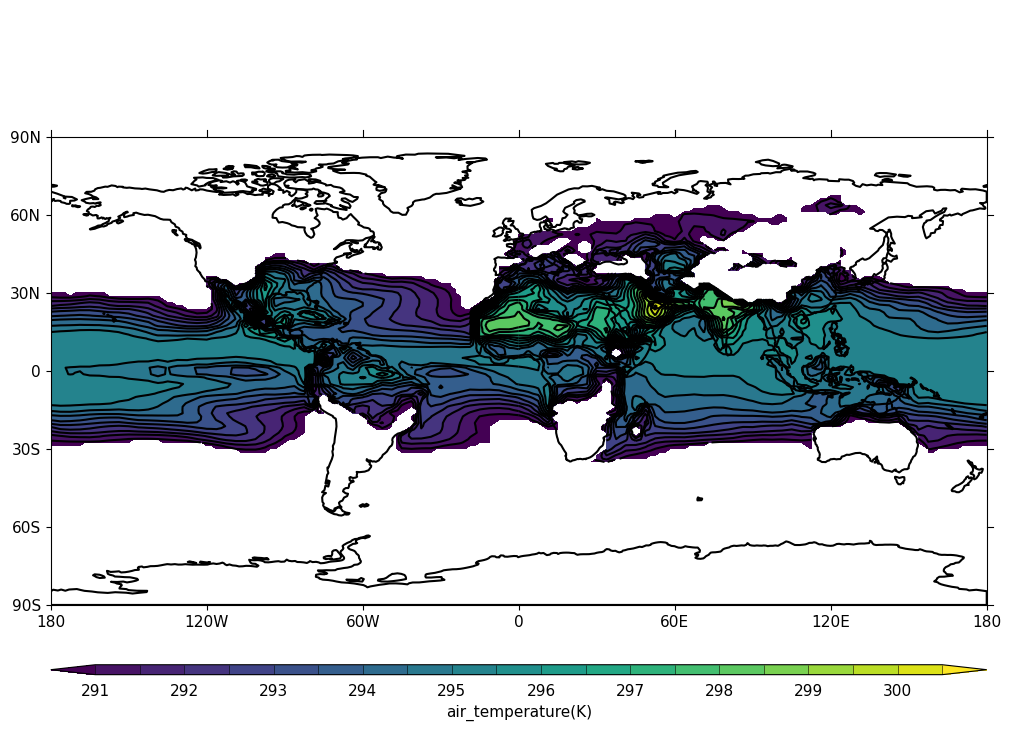

In [52]:
cfp.con(x.subspace[90])

### Manipulate the axes

In [53]:
f.transpose(['X', 'T', 'Y'])

<CF Field: air_temperature(longitude(192), time(120), latitude(145)) K>

### Modifying the units

In [54]:
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
f.units, f.mean()

('K', <CF Data(): 276.5847382914912 K>)

In [55]:
f.units = 'degC'
f.units, f.mean()

('degC', <CF Data(): 3.434738291491425 degC>)

In [56]:
f.Units # Upper case "U" gives a units object that we can manipulate

<Units: degC>

In [57]:
f.Units += 273.15
f.Units, f.units, f.mean()

(<Units: K>, 'K', <CF Data(): 276.5847382914912 K>)

### Field arithmetic

In [58]:
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [59]:
f.data.stats()

{'minimum': <CF Data(): 203.62451171875 K>,
 'mean': <CF Data(): 276.5847382914912 K>,
 'median': <CF Data(): 280.7393942529291 K>,
 'maximum': <CF Data(): 311.89597497768546 K>,
 'range': <CF Data(): 108.27146325893546 K>,
 'mid_range': <CF Data(): 257.7602433482177 K>,
 'standard_deviation': <CF Data(): 20.816570165513593 K>,
 'root_mean_square': <CF Data(): 277.3669898333767 K>,
 'sample_size': 3340800}

In [60]:
g = f + 2
g

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [61]:
g.data.stats() #min(), g.mean(), g.max()

{'minimum': <CF Data(): 205.62451171875 K>,
 'mean': <CF Data(): 278.5847382914912 K>,
 'median': <CF Data(): 282.7393942529291 K>,
 'maximum': <CF Data(): 313.89597497768546 K>,
 'range': <CF Data(): 108.27146325893546 K>,
 'mid_range': <CF Data(): 259.7602433482177 K>,
 'standard_deviation': <CF Data(): 20.816570165513593 K>,
 'root_mean_square': <CF Data(): 279.3613896056407 K>,
 'sample_size': 3340800}

In [62]:
g = f - f
g

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [63]:
g.data.stats()

{'minimum': <CF Data(): 0.0 K>,
 'mean': <CF Data(): 0.0 K>,
 'median': <CF Data(): 0.0 K>,
 'maximum': <CF Data(): 0.0 K>,
 'range': <CF Data(): 0.0 K>,
 'mid_range': <CF Data(): 0.0 K>,
 'standard_deviation': <CF Data(): 0.0 K>,
 'root_mean_square': <CF Data(): 0.0 K>,
 'sample_size': 3340800}

In [64]:
x = f.copy()
x.units = 'degC'
x.data

<CF Data(120, 145, 192): [[[-28.32420959472654, ..., -28.623114013671852]]] degC>

#### Subtract the celcius field from the Kelvin field and check that the result is zero 

In [65]:
(f - x).data.stats()

{'minimum': <CF Data(): 0.0 K>,
 'mean': <CF Data(): 0.0 K>,
 'median': <CF Data(): 0.0 K>,
 'maximum': <CF Data(): 0.0 K>,
 'range': <CF Data(): 0.0 K>,
 'mid_range': <CF Data(): 0.0 K>,
 'standard_deviation': <CF Data(): 0.0 K>,
 'root_mean_square': <CF Data(): 0.0 K>,
 'sample_size': 3340800}

In [66]:
g = f * x
g

<CF Field: ncvar%tas(time(120), latitude(145), longitude(192)) K2>

#### Find the anomalies relative to the first time (broadcasting)

In [67]:
first_time = f.subspace[0]
first_time = first_time.transpose(['Y', 'T', 'X'])
first_time

<CF Field: air_temperature(latitude(145), time(1), longitude(192)) K>

In [68]:
anomaly  = f - first_time
anomaly

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [69]:
anomaly.data.stats()

{'minimum': <CF Data(): -32.62007141113281 K>,
 'mean': <CF Data(): 1.441687174432139 K>,
 'median': <CF Data(): 0.0 K>,
 'maximum': <CF Data(): 53.50559997558594 K>,
 'range': <CF Data(): 86.12567138671875 K>,
 'mid_range': <CF Data(): 10.442764282226562 K>,
 'standard_deviation': <CF Data(): 10.874943957481905 K>,
 'root_mean_square': <CF Data(): 10.970089698233751 K>,
 'sample_size': 3340800}

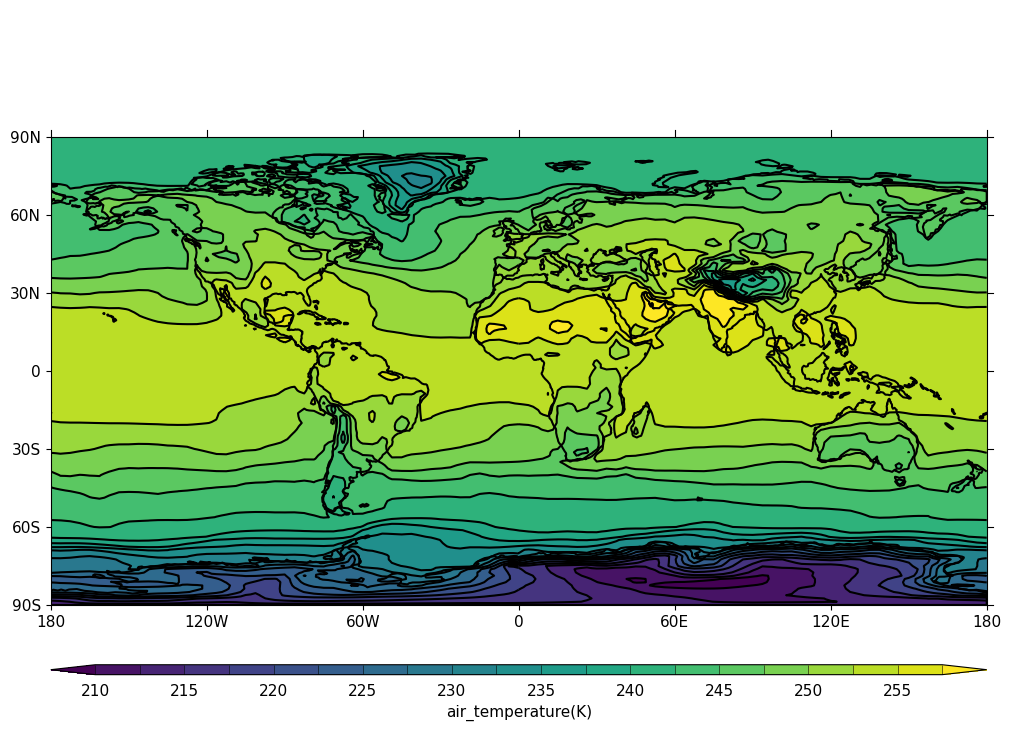

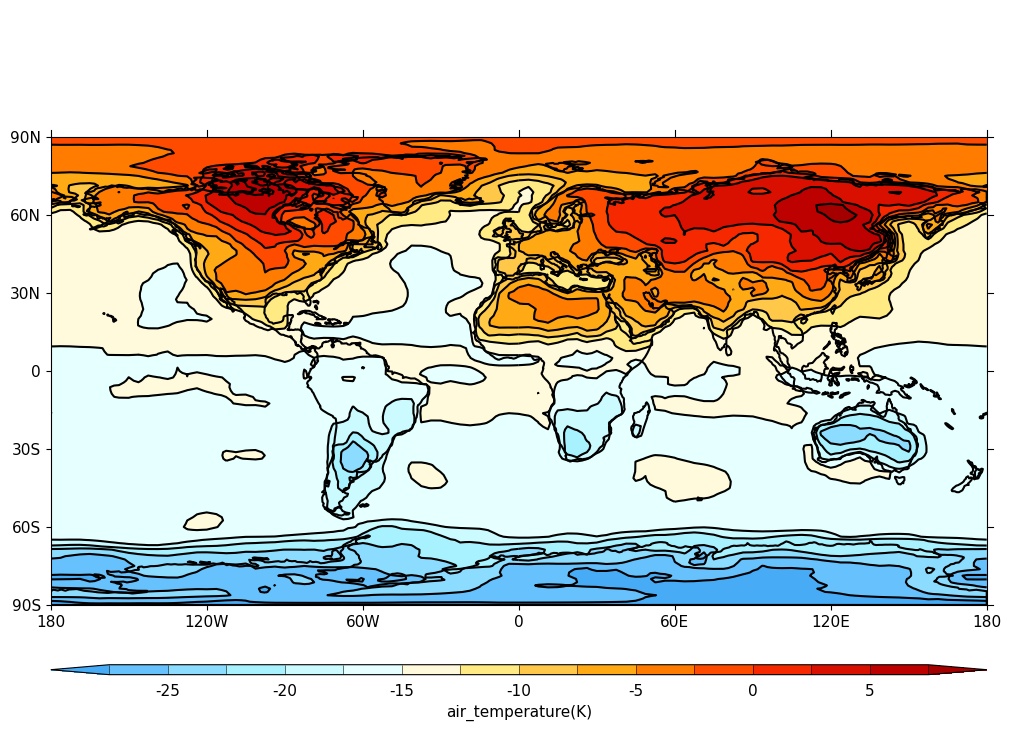

In [70]:
cfp.con(f.subspace(T=cf.contains(cf.dt('1962-06-04'))))
cfp.con(anomaly.subspace(T=cf.contains(cf.dt('1962-06-04'))))

# 4. Statistical operations
https://ncas-cms.github.io/cf-python/analysis.html#statistical-collapses

In [71]:
g = f.collapse('max')
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(1), longitude(1)) K
Cell methods    : time(1): mean (interval: 30 minutes) time(1): latitude(1): longitude(1): maximum
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(1) = [0.0] degrees_north
                : longitude(1) = [179.0625] degrees_east
                : height(1) = [2.0] m


In [72]:
g.data

<CF Data(1, 1, 1): [[[311.89597497768546]]] K>

In [73]:
g = f.collapse('T: mean')
print(g)
print('data values:\n', g.data, '\n')
print('time bounds:\n', g.coord('T').bounds.dtarray)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
data values:
 [[[227.6330727895101, ..., 254.5096071879069]]] K 

time bounds:
 [[cftime.DatetimeNoLeap(1959, 12, 1, 0, 0, 0, 0, has_year_zero=True)
  cftime.DatetimeNoLeap(1969, 12, 1, 0, 0, 0, 0, has_year_zero=True)]]


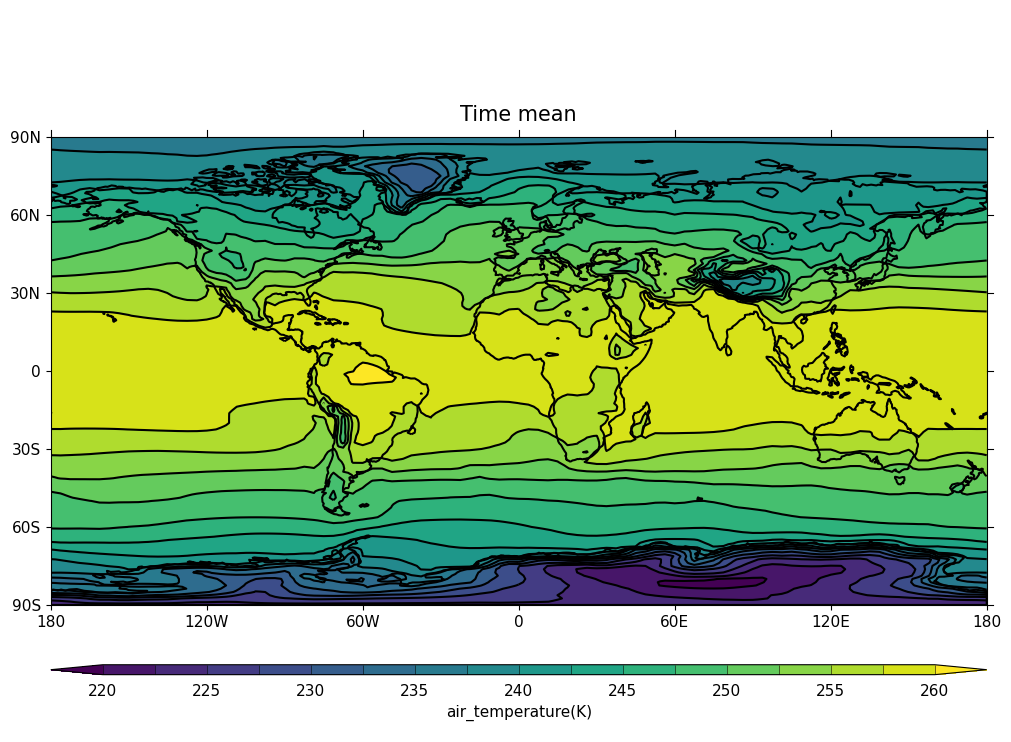

In [74]:
cfp.con(g, title='Time mean')

#### Collapse multiple axes simultaneously

In [75]:
g = f.collapse('X: Y: sd')
g

<CF Field: air_temperature(time(120), latitude(1), longitude(1)) K>

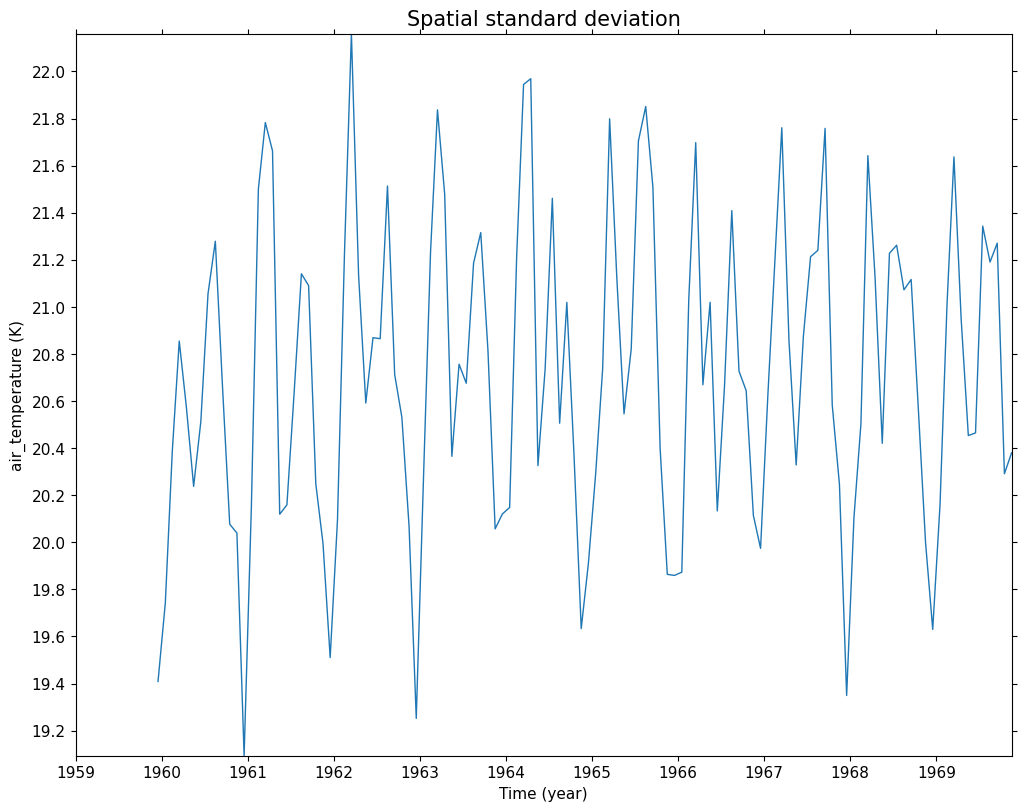

In [76]:
cfp.lineplot(g, title='Spatial standard deviation')

#### Collapse an axis into groups, rather than a single value

In [77]:
g = f.collapse('T: mean', group=cf.seasons())
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(40), latitude(145), longitude(192)) K
Cell methods    : time(40): mean (interval: 30 minutes) time(40): mean
Dimension coords: time(40) = [1960-01-15 00:00:00, ..., 1969-10-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


#### `cf.seasons()` returns a (customizable) list of queries, each of which defines a range of months

In [78]:
cf.seasons()

[<CF Query: month[(ge 12) | (le 2)]>,
 <CF Query: month(wi (3, 5))>,
 <CF Query: month(wi (6, 8))>,
 <CF Query: month(wi (9, 11))>]

#### By default, collapses are **not** weighted

In [79]:
g = f.collapse('area: mean') # Area mean for each time
g = g.collapse('T: max') # Time maxiumum of the area means
print(g.data)
print(g)

[[[280.11314160613665]]] K
Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(1), longitude(1)) K
Cell methods    : time(1): mean (interval: 30 minutes) area: mean time(1): maximum
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(1) = [0.0] degrees_north
                : longitude(1) = [179.0625] degrees_east
                : height(1) = [2.0] m


### File aggregation

#### Create a sequence of files on disk, each of which contains one year

In [80]:
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
print(f)
for i in range(10):
    g = f.subspace[12*i:12*(i+1)]
    year = g.coord('T').year.array[0]
    new_file = 'air_temperature_'+str(year)+'.nc'
    cf.write(g, new_file)
    print('    creating new file:',new_file)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
    creating new file: air_temperature_1959.nc
    creating new file: air_temperature_1960.nc
    creating new file: air_temperature_1961.nc
    creating new file: air_temperature_1962.nc
    creating new file: air_temperature_1963.nc
    creating new file: air_temperature_1964.nc
    creating new file: air_temperature_1965.nc
    creating new file: air_temperature_1966.nc
    creating new file: air_temperature_1967.nc
    creating new file: air_temperature_1968.nc


#### In ipython `!` preceeeds a shell command

In [81]:
!ls -o air_temperature_*.nc

-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1959.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1960.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1961.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1962.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1963.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1964.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1965.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1966.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1967.nc
-rw-rw-r-- 1 ankit 2707383 Nov 29 14:23 air_temperature_1968.nc


In [82]:
f2 = cf.read('air_temperature_*.nc')
print(f2)

[<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>]


In [83]:
f.equals(f2[0])

True

In [84]:
f3 = cf.read('air_temperature_*.nc', aggregate=False)
f3

[<CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>,
 <CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>]

# 5. PP and UM fields files

In [85]:
x = cf.read('ncas_data/aaaaoa.pmh8dec.pp')
x

[<CF Field: relative_humidity(grid_latitude(30), grid_longitude(24)) %>,
 <CF Field: id%UM_m01s08i233_vn405(grid_latitude(30), grid_longitude(24)) kg m-2 s-1>,
 <CF Field: relative_humidity(air_pressure(17), grid_latitude(30), grid_longitude(24)) %>]

In [86]:
print(x[1])

Field: id%UM_m01s08i233_vn405 (ncvar%UM_m01s08i233_vn405)
---------------------------------------------------------
Data            : id%UM_m01s08i233_vn405(grid_latitude(30), grid_longitude(24)) kg m-2 s-1
Cell methods    : time(1): mean
Dimension coords: time(1) = [1978-12-16 12:00:00] gregorian
                : grid_latitude(30) = [7.480000078678131, ..., -5.279999852180481] degrees
                : grid_longitude(24) = [-5.720003664493561, ..., 4.399996280670166] degrees
Auxiliary coords: latitude(grid_latitude(30), grid_longitude(24)) = [[61.004354306111864, ..., 48.51422609871432]] degrees_north
                : longitude(grid_latitude(30), grid_longitude(24)) = [[-13.762685427418687, ..., 4.622216504491947]] degrees_east
Coord references: grid_mapping_name:rotated_latitude_longitude


In [87]:
cf.write(x, 'aaaaoa.pmh8dec.nc')
y = cf.read('aaaaoa.pmh8dec.nc')
y

[<CF Field: relative_humidity(grid_latitude(30), grid_longitude(24)) %>,
 <CF Field: long_name=CANOPY THROUGHFALL RATE      KG/M2/S(grid_latitude(30), grid_longitude(24)) kg m-2 s-1>,
 <CF Field: relative_humidity(air_pressure(17), grid_latitude(30), grid_longitude(24)) %>]

# 6. What this course doesn't cover

-------

* ### create new field constructs in memory,
* ### incorporate, and create, metadata stored in external files,
* ### read, write, and create data that have been compressed by convention (i.e. ragged or gathered arrays), whilst presenting a view of the data in its uncompressed form,
* ### perform histogram, percentile and binning operations on field constructs,
* ### apply convolution filters to field constructs,
* ### calculate derivatives of field constructs,
* ### create field constructs to create derived quantities (such as vorticity),
* ### read, write, and create coordinates defined by geometry cells,
* ### read datasets containing hierarchical groups.


------------


# ... however, regridding is covered later

------------